# How to use a Kerchunk JSON file.
The standard format for Kerchunk files is JSON for storing references to archive data chunks. This requires fsspec and xarray - although these do not need to be the latest, there is no need to not use fsspec 2023.6.0+ and xarray 2023.8.0+ as these will also work with Parquet.

In [1]:
# Modules to import
import fsspec
import xarray as xr

CEDA hosts a web-based file access service which now exposes Kerchunk files representing CMIP6 and CCI datasets.

In [2]:
# An example Kerchunk file hosted at CEDA
kfile = 'https://dap.ceda.ac.uk/badc/cmip6/metadata/kerchunk/pipeline1/CMIP/AS-RCEC/TaiESM1/kr1.0/CMIP6_CMIP_AS-RCEC_TaiESM1_historical_r1i1p1f1_3hr_clt_gn_v20201013_kr1.0.json'

Open a virtual filesystem object from fsspec, providing the kerchunk file as a 'reference' type file. Note that if the file is compressed using zstd as some kerchunk files are, the compression needs to be set to 'zstd'/'zst'

In [3]:
mapper = fsspec.get_mapper('reference://',fo=kfile, backend_kwargs={'compression':None}, remote_protocol='https')
ds = xr.open_zarr(mapper, consolidated=False, decode_times=True)

The Kerchunk file is used to create a virtual Xarray object which can be interrogated in terms of metadata and variable attributes without needing to fetch the original data.

In [9]:
ds

<xarray.Dataset>
Dimensions:    (time: 481794, lat: 192, lon: 288, bnds: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-01 00:00:00 ... 2014-12-31 22:30:00
Dimensions without coordinates: bnds
Data variables:
    clt        (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(1, 192, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(1, 288, 2), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/52)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    tracking_id:               See individual files for more details
    variable_id:               clt
    variant_label:             r1i1p1f1
    kerchunk_revision:         1
    kerchunk_creation_date:    160124T160639

Any plotting can then be done with this object.

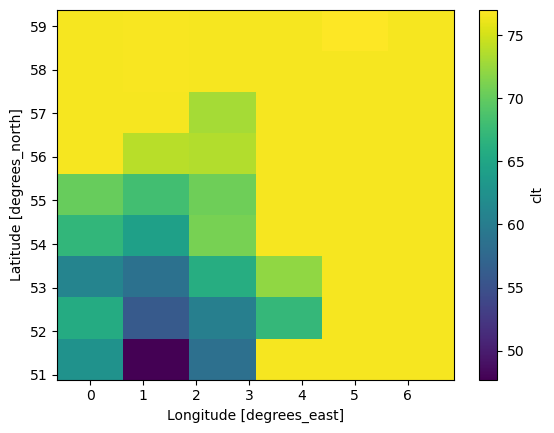

In [5]:
ds['clt'].sel(lat=slice(51,59), lon=slice(-15,7)).isel(time=slice(0,5)).mean(dim='time').plot()

# Kerchunk to Zarr exporting
Kerchunk-opened Xarray DataArrays can be directly written as a zarr output store.
The example above can be written to a separate Xarray virtual object

In [6]:
zarr1 = ds['clt'].sel(lat=slice(51,59), lon=slice(-15,7)).isel(time=slice(0,5)).to_dataset()

In [7]:
zarr1.to_zarr('example_clt.zarr')

ContainsGroupError: path '' contains a group

In [ ]:
zarr2 = xr.open_zarr('example_clt.zarr')

In [ ]:
zarr2.mean(dim='time').to_array().plot()